# Simple Linear Regression

In [15]:
import statsmodels.api as sm
from statsmodels.api import OLS
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset : Tips Dataset

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :

1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  - Label : Tips
  - Features : Total Bill
3. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
4. Action : Make food servers allocation 
5. Value : the sake of staff morale

In [16]:
tips = sns.load_dataset('tips')

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips[['tip', 'total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [19]:
tips[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

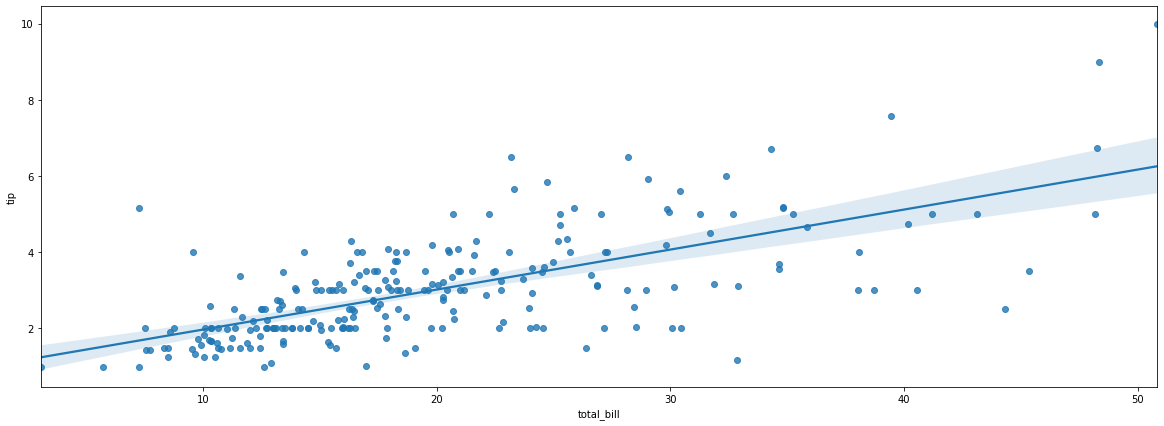

In [20]:
plt.figure(figsize=(20,7))
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

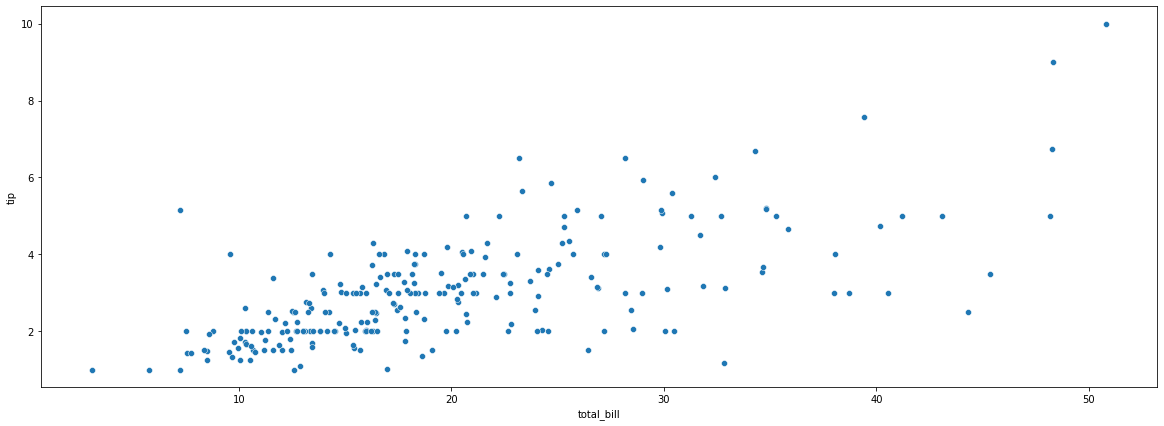

In [21]:
plt.figure(figsize=(20,7))
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

- Y = Tips
- X = Total Bill

In [23]:
tips_model = OLS(tips['tip'], sm.add_constant(tips[['total_bill']]))

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
hasil = tips_model.fit()

In [25]:
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           6.69e-34
Time:                        11:57:24   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [26]:
tips[['tip', 'total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


F-Test:
<br>
B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.
<br>
Partial Test:

1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers

Parameter Estimate:

1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval
1. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar) 
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square = 45.7% : This model can explain 45.7% variation of tips.

# Multiple Linear Regression

## Dataset : Tips Dataset

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :

1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  - Label : Tips
  - Features : Total Bill and Size
3. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
4. Action : Make food servers allocation 
5. Value : the sake of staff morale

In [28]:
tips = sns.load_dataset('tips')
tips[['tip', 'total_bill', 'size']]

,tip,total_bill,size
0,1.01,16.99,2
1,1.66,10.34,3
2,3.50,21.01,3
3,3.31,23.68,2
4,3.61,24.59,4
...,...,...,...
239,5.92,29.03,3
240,2.00,27.18,2
241,2.00,22.67,2
242,1.75,17.82,2


In [29]:
tips[['tip', 'total_bill', 'size']].describe()

,tip,total_bill,size
count,244.000000,244.000000,244.000000
mean,2.998279,19.785943,2.569672
std,1.383638,8.902412,0.951100
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.900000,17.795000,2.000000
75%,3.562500,24.127500,3.000000
max,10.000000,50.810000,6.000000


In [30]:
tips[['tip', 'total_bill', 'size']].corr()

,tip,total_bill,size
tip,1.000000,0.675734,0.489299
total_bill,0.675734,1.000000,0.598315
size,0.489299,0.598315,1.000000


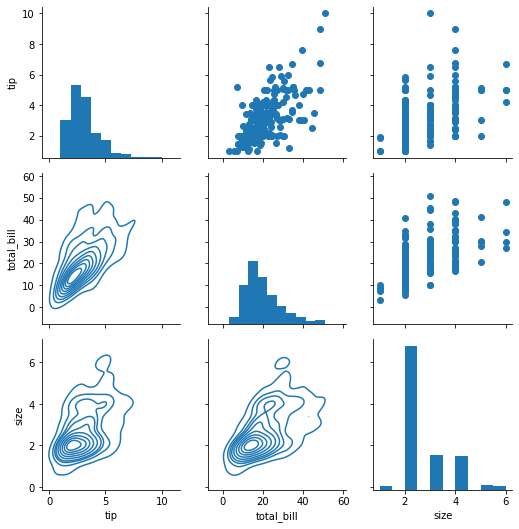

In [31]:
g = sns.PairGrid(tips[['tip', 'total_bill', 'size']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

- Y : Tips
- X : Total Bill dan Size

In [32]:
tips_model_multi = OLS(tips['tip'], sm.add_constant(tips[['total_bill', 'size']]))

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
hasil = tips_model_multi.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           9.67e-34
Time:                        11:57:26   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

F-Test:
<br>
B1, B2 : P-Value of the Simultant test is below 0.05. We have enough evidence that minimum either totall bill or size affect tip that given to the food servers.
<br>
Partial Test:

1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill and size of the party has value of zero. in this case, it doesn't make sense that if there are people who paid food freely and size of the party zero. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that total bill increase tip that given to the food servers
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that size of the party increase tip that given to the food servers

Parameter Estimate:

1. B0 = 0.689 : This is not meaningfull to be interpreted
1. B1 = 0.0927 : When the total bill increase 1 Dollar, the tip will increase about 0.0927 Dollar or When the total bill increase 10 Dollar, the tip will increase about 9.27 Dollar (*This interpretation only applied when total bill fall between 3.07 Dollar and 50.81 Dollar)
1. B2 = 0.1926 : When the size of the party increase 1 person, the tip will increase about 0.1926 Dollar(*This interpretation only applied when size of the party fall between 1 and 6) 
1. It is strongly recommended to interprete within the interval of predictor and no changes in another variable

Coefficient Determination:
<br>
R-Square adj = 46.3% : This model can explain 46.3% variation of tips.
<br>
(* by adding size of the party the coefficient determination increase from 45.7% to 46.3%)


# Diagnostic and Collinearity

## Normality Assumption

In [34]:
residual = hasil.resid
residual

0     -1.619340
1     -0.545394
2      0.305355
3      0.060408
4     -0.109157
         ...   
239    1.981794
240   -1.574089
241   -1.155952
242   -0.956292
243    0.204703
Length: 244, dtype: float64

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residual')

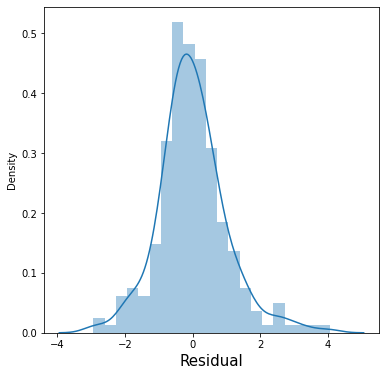

In [35]:
plt.figure(figsize=(6,6))
sns.distplot(residual)
plt.xlabel ('Residual', size = 15)

In [36]:
from scipy.stats import shapiro

In [37]:
shapiro(residual)

ShapiroResult(statistic=0.966621458530426, pvalue=1.7764672520570457e-05)

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

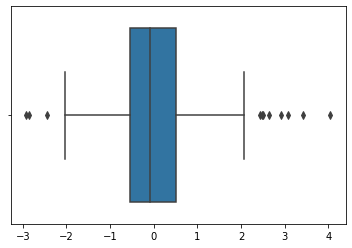

In [38]:
sns.boxplot(residual)

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


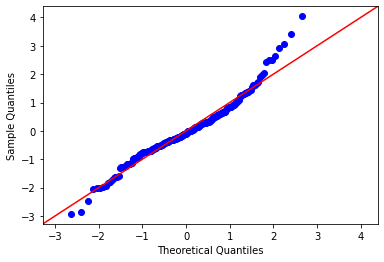

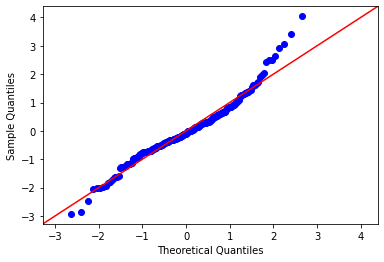

In [39]:
sm.qqplot(residual, line = '45')

# Gauss-Markov Assumption

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residual')

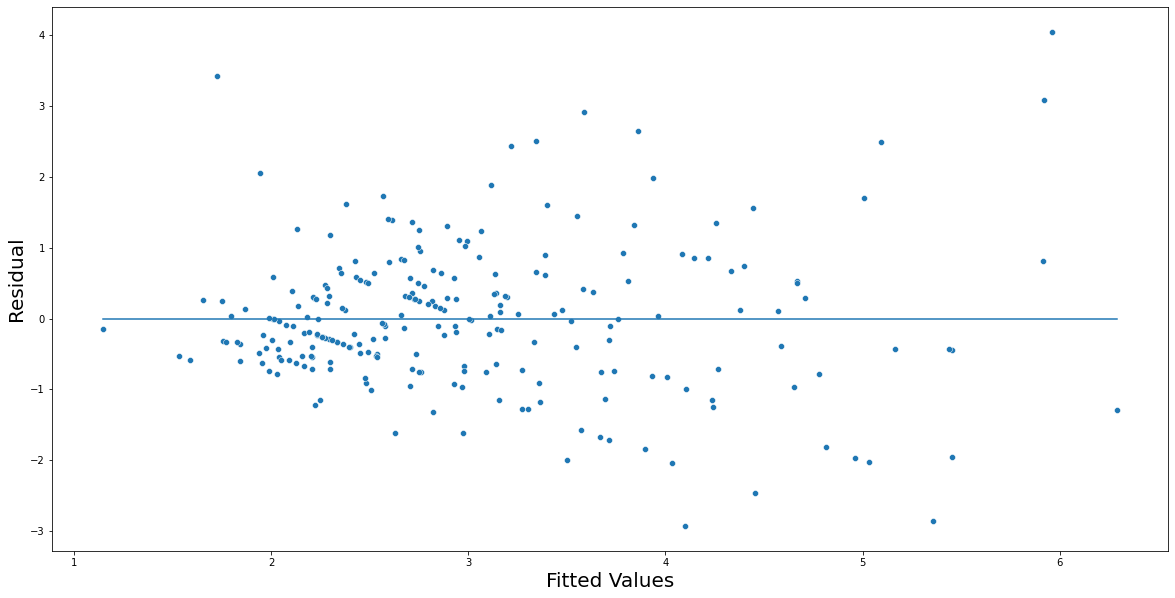

In [40]:
plt.figure(figsize=(20,10))
sns.scatterplot(hasil.fittedvalues, residual)
sns.lineplot(hasil.fittedvalues, 0)
plt.xlabel('Fitted Values', size = 20)
plt.ylabel('Residual', size = 20)

## Multicollinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
def hitung_vif(X) :
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    return vif

In [43]:
hitung_vif(tips[['total_bill', 'size']])

,Variable,VIF
0,total_bill,8.684373
1,size,8.684373


In [44]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Assumption Summary:

1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Heteroscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size.

# Regression With Dummy Var

In [45]:
df_categorical = pd.DataFrame({
    'Gender':['Male','Female','Female','Male','Female','Female','Male'],
    'City':['Jakarta','Bogor','Bogor','Bekasi','Bekasi','Jakarta','Bekasi'],
    'Age':[34,28,23,26,29,25,25],
    'Income': [20000000,15000000,7000000,9000000,12000000,11000000,9000000]
})

In [46]:
df_categorical

,Gender,City,Age,Income
0,Male,Jakarta,34,20000000
1,Female,Bogor,28,15000000
2,Female,Bogor,23,7000000
3,Male,Bekasi,26,9000000
4,Female,Bekasi,29,12000000
5,Female,Jakarta,25,11000000
6,Male,Bekasi,25,9000000


In [47]:
data_dummy = pd.get_dummies(df_categorical, drop_first = True)
data_dummy

,Age,Income,Gender_Male,City_Bogor,City_Jakarta
0,34,20000000,1,0,1
1,28,15000000,0,1,0
2,23,7000000,0,1,0
3,26,9000000,1,0,0
4,29,12000000,0,0,0
5,25,11000000,0,0,1
6,25,9000000,1,0,0


In [48]:
salary_model = OLS(data_dummy['Income'], sm.add_constant(data_dummy[['Age', 'Gender_Male', 'City_Bogor', 'City_Jakarta']]))

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
hasil_salary = salary_model.fit()
print(hasil_salary.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     12.20
Date:                Tue, 31 Aug 2021   Prob (F-statistic):             0.0772
Time:                        11:57:27   Log-Likelihood:                -105.17
No. Observations:                   7   AIC:                             220.3
Df Residuals:                       2   BIC:                             220.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.916e+07   5.24e+06     -3.657   

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [50]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [51]:
tips_dummy = pd.get_dummies(tips, drop_first=True)
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


- X : Tips
- Y : Selain tips

In [52]:
tips_dummy.columns


Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')

In [53]:
model_tipsdummy = OLS(tips_dummy['tip'], sm.add_constant(tips_dummy[['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner']]))

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
hasil_tipsdummy = model_tipsdummy.fit()
print(hasil_tipsdummy.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.20e-28
Time:                        11:57:27   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

In [55]:
model_tipsdummy2 = OLS(tips_dummy['tip'], sm.add_constant(tips_dummy[['total_bill', 'size']]))
hasil_tipsdummy2 = model_tipsdummy2.fit()
print(hasil_tipsdummy2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           9.67e-34
Time:                        11:57:27   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
